In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [24]:
def get_label(path_to_dataset):
    split = path_to_dataset.split('/')[-1].replace('.csv', '').split('_')
    return split[0], int(split[1])


def get_rows(json_record):
    rows = []
    for i, metric_obj in enumerate(json_record['metrics']):
        row = {}
        row['data'] = json_record['data']
        row['model_id'] = i
        row['label'], row['exp_no'] = get_label(row['data'])
        for key, value in metric_obj.items():
            row[key] = metric_obj[key][0]
        rows.append(row)
    return rows

def parse_log(path):
    json_data = json.load(open(path, 'r'))
    rows = []
    for record in json_data:
        rows.extend(get_rows(record))
    column_names = list(rows[0].keys())
    columns = {x: [y[x] for y in rows] for x in column_names}
    return pd.DataFrame(columns)

In [25]:
df = parse_log('./experiments/12_12_2022_cs_uk_id_et/log.json')
display(df)

,data,model_id,label,exp_no,roc_auc_val,binary_f1_score_val,eer_val,precision_val,recall_val
0,experiments/random_cs_uk_id_et/kolla_6.csv,0,kolla,6,0.985110,0.457143,0.0707,0.307692,0.888889
1,experiments/random_cs_uk_id_et/biri_2.csv,0,biri,2,0.951721,0.279570,0.1163,0.185053,0.571429
2,experiments/random_cs_uk_id_et/андан_4.csv,0,андан,4,0.995265,0.416834,0.0342,0.266667,0.954128
3,experiments/random_cs_uk_id_et/добре_4.csv,0,добре,4,0.997045,0.607774,0.0255,0.450262,0.934783
4,experiments/random_cs_uk_id_et/дуже_5.csv,0,дуже,5,0.988064,0.571865,0.0564,0.416481,0.912195
...,...,...,...,...,...,...,...,...,...
975,experiments/random_cs_uk_id_et/datang_7.csv,0,datang,7,0.986799,0.415966,0.0648,0.273481,0.868421
976,experiments/random_cs_uk_id_et/peaks_0.csv,0,peaks,0,0.987518,0.487562,0.0565,0.340278,0.859649
977,experiments/random_cs_uk_id_et/göre_0.csv,0,göre,0,0.978956,0.435897,0.0766,0.307692,0.747253
978,experiments/random_cs_uk_id_et/jekk_5.csv,0,jekk,5,0.979444,0.498886,0.0713,0.400000,0.662722


In [12]:
def get_means(df):
    dropped = df.drop(columns=['data', 'exp_no'], axis=1)
    return dropped.groupby(by=['model_id', 'label']).mean()

In [13]:
means = get_means(df)
display(means)

roc_auc_val  binary_f1_score_val  eer_val  precision_val  \
model_id label                                                               
0        acestea     0.997645             0.560180  0.01516       0.395877   
         adalah      0.963914             0.496049  0.09470       0.375416   
         akan        0.977894             0.562189  0.07549       0.429035   
         avem        0.966527             0.362883  0.09071       0.240708   
         avro        0.979966             0.643581  0.06947       0.565229   
...                       ...                  ...      ...            ...   
         тому        0.984001             0.715578  0.06334       0.638079   
         україні     0.995084             0.510303  0.03598       0.352203   
         чейин       0.981815             0.483297  0.06971       0.362384   
         элек        0.959243             0.358985  0.10170       0.318930   
         эмес        0.980639             0.699992  0.06591       0.842264   

                  recall_val  
model_id label                
0        acestea    0.984545  
         adalah     0.767660  
         akan       0.857713  
         avem       0.778302  
         avro       0.784252  
...                      ...  
         тому       0.840396  
         україні    0.950000  
         чейин      0.774038  
         элек       0.517582  
         эмес       0.630024  

[98 rows x 5 columns]

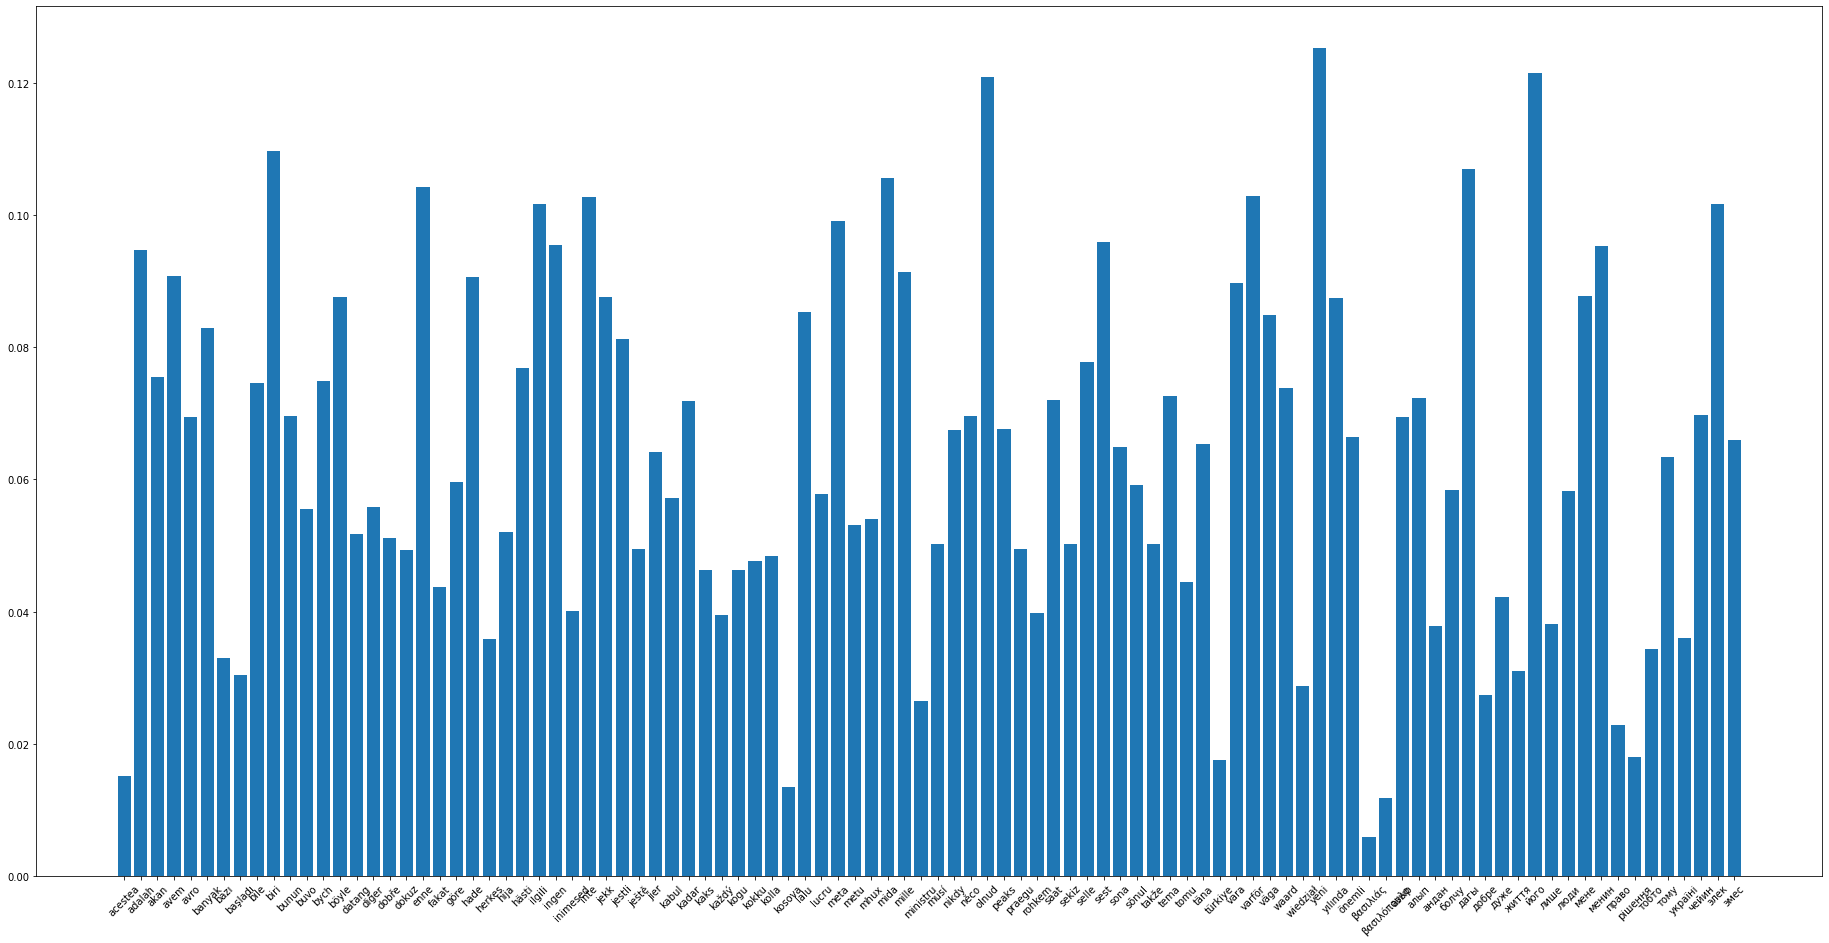

In [20]:
plt.figure(figsize=(32, 16))
plt.bar([x[1] for x in means.index], means['eer_val'])
plt.xticks(rotation = 45)
plt.show()

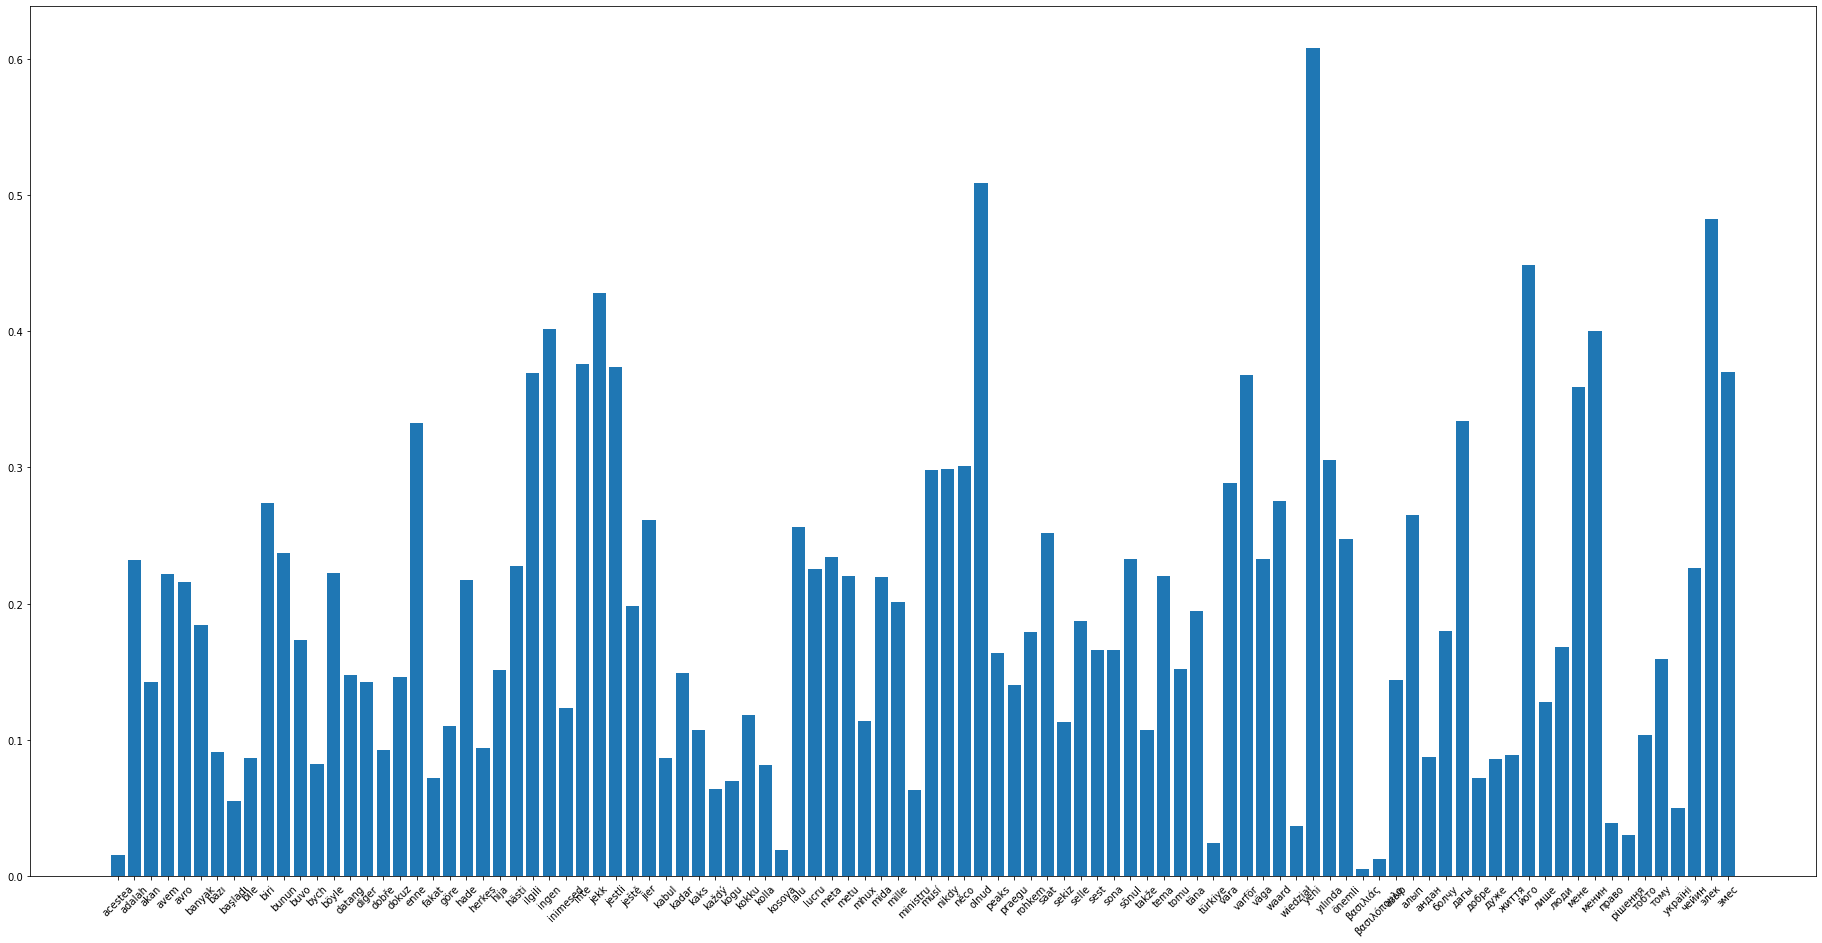

In [23]:
plt.figure(figsize=(32, 16))
plt.bar([x[1] for x in means.index], 1 - means['recall_val'])
plt.xticks(rotation = 45)
plt.show()